<a href="https://colab.research.google.com/github/Leamich/Ragaik/blob/research%2Fdetection/character_recognition/notebooks/train_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
from pathlib import Path
data_path = Path("/content/gdrive/MyDrive/ragaik")

In [ ]:
!unzip  {data_path / "yolo_data.zip"}

Streaming output truncated to the last 5000 lines.
  inflating: yolo_data/train/005331.png  
  inflating: yolo_data/train/006095.png  
  inflating: yolo_data/train/003057.txt  
  inflating: yolo_data/train/006650.png  
  inflating: yolo_data/train/001364.txt  
  inflating: yolo_data/train/002072.txt  
  inflating: yolo_data/train/008457.txt  
  inflating: yolo_data/train/002806.png  
  inflating: yolo_data/train/001342.png  
  inflating: yolo_data/train/008811.png  
  inflating: yolo_data/train/004441.txt  
  inflating: yolo_data/train/001378.txt  
  inflating: yolo_data/train/002588.png  
  inflating: yolo_data/train/005024.png  
  inflating: yolo_data/train/009136.txt  
  inflating: yolo_data/train/005040.txt  
  inflating: yolo_data/train/000845.txt  
  inflating: yolo_data/train/007724.txt  
  inflating: yolo_data/train/009164.png  
  inflating: yolo_data/train/002525.txt  
  inflating: yolo_data/train/008139.png  
  inflating: yolo_data/train/006313.png  
  inflating: yolo_data/tr

In [ ]:
data_path = Path("/content/yolo_data/")

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 45.4/112.6 GB disk)


In [ ]:
import os
import shutil
from pathlib import Path

yolo_data_base = data_path.parent / "formatted_yolo_dataset"
yolo_data_base.mkdir(exist_ok=True)

(yolo_data_base / "images").mkdir(exist_ok=True)
(yolo_data_base / "labels").mkdir(exist_ok=True)

splits = ["train", "val", "test"]

for split in splits:
    split_images_dir = yolo_data_base / "images" / split
    split_labels_dir = yolo_data_base / "labels" / split

    split_images_dir.mkdir(exist_ok=True)
    split_labels_dir.mkdir(exist_ok=True)

    source_split_dir = data_path / split

    for file_path in source_split_dir.iterdir():
        if file_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
            shutil.copy(file_path, split_images_dir / file_path.name)

            label_file_name = file_path.with_suffix(".txt").name
            label_source_path = source_split_dir / label_file_name
            if label_source_path.exists():
                shutil.copy(label_source_path, split_labels_dir / label_file_name)

data_yaml_path = yolo_data_base / "data.yaml"

with open(data_yaml_path, "w") as f:
    f.write(f'''path: {yolo_data_base}
train: images/train
val: images/val
test: images/test

names:
    0: math
    1: text''')

print(f"YOLO dataset created at: {yolo_data_base}")

data_path = data_yaml_path

YOLO dataset created at: /content/formatted_yolo_dataset


In [ ]:
!cat {data_yaml_path}

path: /content/formatted_yolo_dataset
train: images/train
val: images/val
test: images/test

names:
    0: math
    1: text

In [ ]:
data_yaml_path.parent

PosixPath('/content/formatted_yolo_dataset')

In [ ]:
txt = next(iter(data_yaml_path.parent.glob("*/*/*.txt")))
!tail { txt }

0.00000000 0.07864583 0.69537037 0.12291667 0.09259259
1.00000000 0.18645833 0.69583333 0.06979167 0.07500000
0.00000000 0.33750000 0.69537037 0.19583333 0.07592593
0.00000000 0.55859375 0.69537037 0.24114583 0.07407407
0.00000000 0.75182292 0.69583333 0.13802083 0.08425926
1.00000000 0.85833333 0.69583333 0.07083333 0.08611111
1.00000000 0.08671875 0.04675926 0.15885417 0.08055556
1.00000000 0.20729167 0.04675926 0.07395833 0.07685185
1.00000000 0.66536458 0.04675926 0.18802083 0.08796296
1.00000000 0.83125000 0.04629630 0.13645833 0.08703704


In [ ]:
# Load YOLO11n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11m.pt')  # load a pretrained YOLO detection model
model.train(data=data_yaml_path, epochs=6)  # train the model

100%|██████████| 38.8M/38.8M [00:00<00:00, 310MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/formatted_yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=6, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

100%|██████████| 755k/755k [00:00<00:00, 70.1MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              


  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

100%|██████████| 5.35M/5.35M [00:00<00:00, 84.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2711.6±1160.5 MB/s, size: 168.6 KB)


train: Scanning /content/formatted_yolo_dataset/labels/train... 9813 images, 2 backgrounds, 0 corrupt: 100%|██████████| 9813/9813 [00:11<00:00, 843.72it/s]


train: New cache created: /content/formatted_yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1502.2±458.3 MB/s, size: 154.0 KB)


val: Scanning /content/formatted_yolo_dataset/labels/val... 1227 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1227/1227 [00:02<00:00, 547.67it/s]

val: New cache created: /content/formatted_yolo_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 6 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/6      10.3G     0.6379     0.6041     0.9338        443        640: 100%|██████████| 614/614 [06:48<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:22<00:00,  1.70it/s]


                   all       1227      60397      0.956      0.962      0.987      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/6      9.95G     0.4813     0.3773     0.8545        549        640: 100%|██████████| 614/614 [06:31<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.83it/s]


                   all       1227      60397      0.964      0.949      0.986      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/6      10.4G     0.4425      0.339     0.8414        462        640: 100%|██████████| 614/614 [06:29<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:22<00:00,  1.71it/s]


                   all       1227      60397      0.965      0.948      0.986      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/6      11.2G     0.4038     0.3041     0.8304        320        640: 100%|██████████| 614/614 [06:26<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.91it/s]


                   all       1227      60397      0.981      0.981      0.993      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/6      11.1G     0.3709     0.2726     0.8221        604        640: 100%|██████████| 614/614 [06:25<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.80it/s]


                   all       1227      60397      0.985      0.984      0.993      0.958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/6      10.4G     0.3442     0.2477     0.8155        329        640: 100%|██████████| 614/614 [06:26<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.83it/s]

                   all       1227      60397      0.985      0.988      0.994      0.962



6 epochs completed in 0.696 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.43it/s]


                   all       1227      60397      0.985      0.988      0.994      0.962
                  math       1227      15945      0.993      0.987      0.994      0.943
                  text       1227      44452      0.977      0.988      0.994      0.981
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc1bc6e2210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
help(model("MatAn-Sep11-06.png")[0].show)


image 1/1 /content/MatAn-Sep11-06.png: 352x640 26 maths, 43 texts, 105.8ms
Speed: 7.8ms preprocess, 105.8ms inference, 5.2ms postprocess per image at shape (1, 3, 352, 640)
Help on method show in module ultralytics.engine.results:

show(*args, **kwargs) method of ultralytics.engine.results.Results instance
    Display the image with annotated inference results.
    
    This method plots the detection results on the original image and displays it. It's a convenient way to
    visualize the model's predictions directly.
    
    Args:
        *args (Any): Variable length argument list to be passed to the `plot()` method.
        **kwargs (Any): Arbitrary keyword arguments to be passed to the `plot()` method.
    
    Examples:
        >>> results = model("path/to/image.jpg")
        >>> results[0].show()  # Display the first result
        >>> for result in results:
        >>>     result.show()  # Display all results




image 1/1 /content/MatAn-Sep11-06.png: 352x640 10 maths, 32 texts, 23.8ms
Speed: 3.6ms preprocess, 23.8ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)


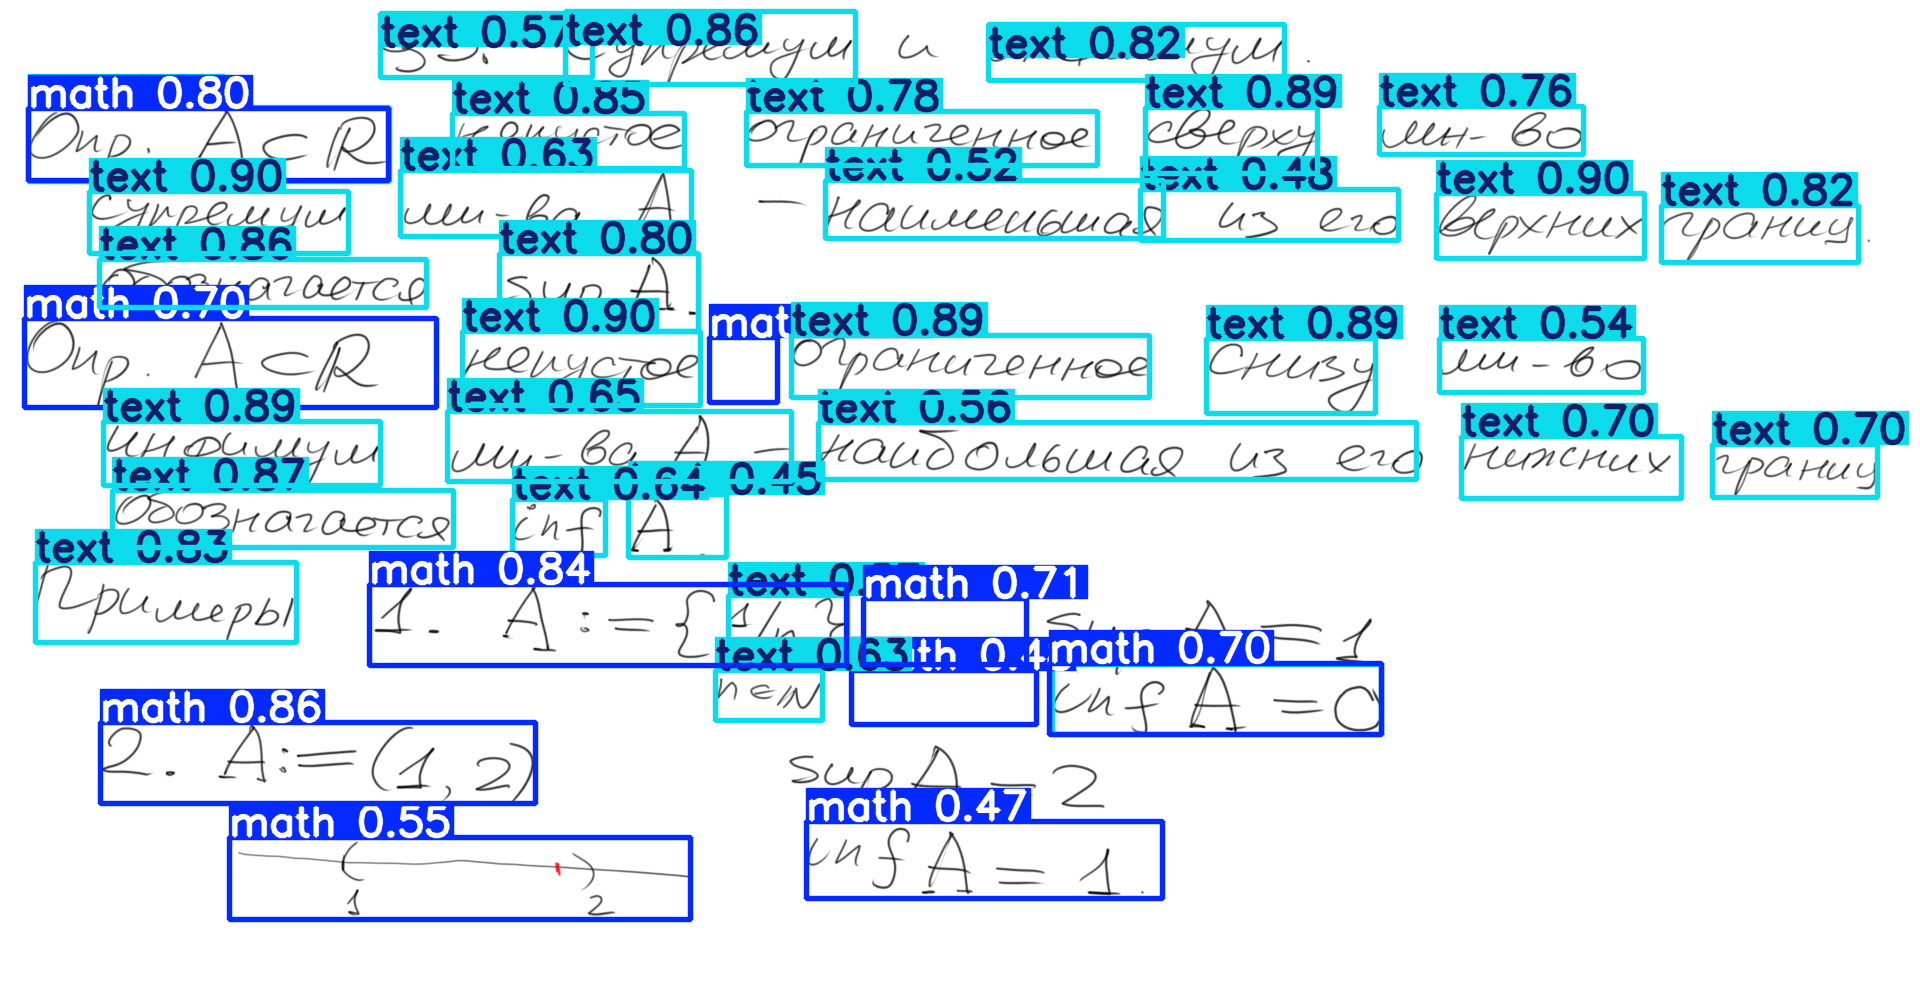

In [ ]:
model("MatAn-Sep11-06.png", conf=0.4)[0].show()

In [ ]:
!du -sh /content/runs

87M	/content/runs


In [ ]:
!mv /content/runs /content/gdrive/MyDrive/ragaik/yolo_runs